In [ ]:
## TODO: code the enumerate from scratch

### Bound methods

In [35]:
class MyClass:
    
    def hello(*args):
        if len(args) == 0:
            print(f'hello from MyClass')
        else:
            print(f'Hello from {args}')
    
    def __init__(self, name):
        self.name = name

In [36]:
MyClass.hello

<function __main__.MyClass.hello(*args)>

In [37]:
MyClass.hello()

hello from MyClass


In [38]:
obj = MyClass('Theo')
obj

In [39]:
obj.hello

<bound method MyClass.hello of <__main__.MyClass object at 0x000001B9270CB3D0>>

In [43]:
obj.hello()

Hello from (<__main__.MyClass object at 0x000001B9270CB3D0>,)


In [44]:
MyClass.hello(obj)

Hello from (<__main__.MyClass object at 0x000001B9270CB3D0>,)


## `obj.hello()` is INDENTICAL to `MyClass.hello(obj)`

In [45]:
## IDENTICAL to MyClass.hello
obj.hello.__func__  

<function __main__.MyClass.hello(*args)>

In [48]:
MyClass.hello

<function __main__.MyClass.hello(*args)>

## `obj.hello.__func__` is IDENTICAL to `MyClass.hello`

In [46]:
## IDENTICAL to obj
obj.hello.__self__ 

In [47]:
obj

In [ ]:
LIO202503

In [40]:
type(obj), type(MyClass)

(__main__.MyClass, type)

In [41]:
isinstance(obj, MyClass)

True

In [42]:
isinstance(MyClass, type)

True

## Enumerations
- Enum, 
- IntEnum, Flag, IntFlag

In [52]:
RED = 1
GREEN = 2
BLUE = 3

COLORS = (RED, GREEN, BLUE)

pixel_color = {RED: 255, BLUE: 0 , GREEN:200}
pixel_color[RED]  #--> 255s

255

In [53]:
RED in COLORS

True

In [54]:
1 in COLORS  # Since RED is 1

True

In [55]:
RED < GREEN  # Since 1 < 2s

True

In [56]:
from enum import Enum

In [57]:
class Color(Enum):
    RED = 1
    GREEN = 2
    BLUE = 3

In [58]:
type(Color.RED)

<enum 'Color'>

In [59]:
isinstance(Color.RED, Color)

True

In [60]:
str(Color.RED)

'Color.RED'

In [61]:
repr(Color.RED)

'<Color.RED: 1>'

In [62]:
Color.RED.name

'RED'

In [63]:
Color.RED.value

1

In [64]:
Color.RED in Color

True

In [65]:
Color.RED is Color.RED

True

In [66]:
Color.RED == 1

False

In [67]:
pixel_color = {
    Color.RED : 100,
    Color.GREEN: 25, 
    Color.BLUE : 224
}

In [68]:
pixel_color

{<Color.RED: 1>: 100, <Color.GREEN: 2>: 25, <Color.BLUE: 3>: 224}

### Retrieving object by value

In [69]:
Color(2)

<Color.GREEN: 2>

In [70]:
Color(3)

<Color.BLUE: 3>

### Retrieving object by name

In [71]:
Color["GREEN"]

<Color.GREEN: 2>

In [72]:
Color["BLUE"]

<Color.BLUE: 3>

### Enumerations are iterables

In [73]:
list(Color)  #definition order is preserved

[<Color.RED: 1>, <Color.GREEN: 2>, <Color.BLUE: 3>]

In [74]:
Color.__members__

mappingproxy({'RED': <Color.RED: 1>,
              'GREEN': <Color.GREEN: 2>,
              'BLUE': <Color.BLUE: 3>})

In [76]:
class Constants(Enum):
    ONE=1
    TWO=2
    THREE=3

In [77]:
Constants.ONE 

<Constants.ONE: 1>

In [78]:
Constants.TWO 

<Constants.TWO: 2>

In [79]:
Constants.ONE  <  Constants.TWO 

TypeError: '<' not supported between instances of 'Constants' and 'Constants'

## Members of Enum as hashable!

In [80]:
class Person:

    __hash__ = None

In [81]:
p = Person()
hash(p)

TypeError: unhashable type: 'Person'

In [82]:
class Family(Enum):
    person_1 = Person() # Person is unhashable, i.e. the values are NOT hashable
    person_2 = Person()

Family.person_1  # However we can use the 

<Family.person_1: <__main__.Person object at 0x000001B926FAE820>>

In [83]:
{
    Family.person_1 : 'person 1',
    Family.person_2 : 'person 2'
}

{<Family.person_1: <__main__.Person object at 0x000001B926FAE820>>: 'person 1',
 <Family.person_2: <__main__.Person object at 0x000001B926F9BBE0>>: 'person 2'}

## Enumerations are iterables

In [85]:
hasattr(Family, '__iter__')

True

In [86]:
list(Family)

[<Family.person_1: <__main__.Person object at 0x000001B926FAE820>>,
 <Family.person_2: <__main__.Person object at 0x000001B926F9BBE0>>]

### Enumerations are immutable

In [88]:
class Status(Enum):
    PENDING = 'pending'
    ERROR = 'error'
    FINISHED = 'finished'

In [90]:
Status.PENDING.value

'pending'

In [91]:
Status.PENDING.value = 'hello'

AttributeError: can't set attribute

In [92]:
Status['NEW'] = 100

TypeError: 'EnumMeta' object does not support item assignment

## Extending empty enumerations

In [93]:
class EnumBase(Enum):
    pass

class EnumExt(EnumBase):
    ONE = 1

In [94]:
Status.PENDING

<Status.PENDING: 'pending'>

In [95]:
Status["PENDING"]

<Status.PENDING: 'pending'>

In [96]:
class Person:
    name = 'Alex'
    age = 100

Person.name

'Alex'

In [97]:
Person.age

100

In [99]:
getattr(Person, "name")

'Alex'

In [101]:
getattr(Person, "gender", "male")

'male'

### Checking if something is a member of enum class

In [102]:
def is_member(en, name):
    try:
        en[name]
    except KeyError:
        return False
    return True

# equivalently

def is_member(en, name):
    return getattr(en, name, None) is not None

In [103]:
is_member(Status, 'PENDING')

True

In [104]:
is_member(Status, 'OK')

False

In [105]:
getattr(Status, 'PENDING')

<Status.PENDING: 'pending'>

In [107]:
getattr(Status, 'OK', False)

False

In [108]:
Status.__members__  # from key "name of member" in enumeration and the value is the enumeration object

mappingproxy({'PENDING': <Status.PENDING: 'pending'>,
              'ERROR': <Status.ERROR: 'error'>,
              'FINISHED': <Status.FINISHED: 'finished'>})

In [109]:
Status.__members__['PENDING'] is Status.PENDING

True

In [110]:
'PENDING' in Status.__members__

True

### ALIASES

In [114]:
class Color(Enum):
    red = 1
    blue = 1  # alias to red
    
    green = 2 
    yellow = 2 # alias to green
    black = 2

In [115]:
Color.__members__

mappingproxy({'red': <Color.red: 1>,
              'blue': <Color.red: 1>,
              'green': <Color.green: 2>,
              'yellow': <Color.green: 2>,
              'black': <Color.green: 2>})

In [116]:
list(Color)

[<Color.red: 1>, <Color.green: 2>]

In [117]:
Color.red is Color.blue

True

In [122]:
Color(1)

<Color.red: 1>

In [124]:
Color['blue']  # return the MASTER member

<Color.red: 1>

In [119]:
Color(2)

<Color.green: 2>

In [125]:
Color['yellow']

<Color.green: 2>

## Ensure unique values

In [127]:
import enum

@enum.unique
class Color(Enum):
    red = 1
    blue = 1  # alias to red
    
    green = 2 
    yellow = 2 # alias to green
    black = 2

ValueError: duplicate values found in <enum 'Color'>: blue -> red, yellow -> green, black -> green

In [128]:
class Color(Enum):
    red = 1
    blue = 1  # alias to red
    
    green = 2 
    yellow = 2 # alias to green
    black = 2

In [129]:
Color.blue in Color

True

In [130]:
Color.blue is Color.red

True

In [132]:
Color(1)  # Returns the MASTER

<Color.red: 1>

In [131]:
Color(2)

<Color.green: 2>

In [135]:
Color['red'], Color['blue']

(<Color.red: 1>, <Color.red: 1>)

### Every member of Enum is TRUTHY

In [136]:
class State(Enum):
    READY = 1
    BUSY = 0

In [137]:
bool(State.READY)

True

In [138]:
bool(State.BUSY)

True

## Overriding `bool`

In [151]:
class State2(Enum):
    READY = 1
    BUSY = 0

    def __bool__(self):
        return bool(self.value)

In [152]:
bool(State2.READY)

True

In [153]:
bool(State2.BUSY)

False

### All members of enumerations are hashable, so I can use them as keys!

In [165]:
class Color(Enum):
    red = 1
    green = 2
    blue = 3

    def purecolor(self, value):
        return {self : value}

In [166]:
Color.red

<Color.red: 1>

In [167]:
Color.red.purecolor(255)

{<Color.red: 1>: 255}

In [169]:
Color.blue.purecolor(65)

{<Color.blue: 3>: 65}

In [187]:
class Color(Enum):
    red = 1
    green = 2
    blue = 3

    def purecolor(self, value):
        return {self : value}

    def __repr__(self):
        return f'{self.name}({self.value})'

    #less than
    def __lt__(self, other):
        return isinstance(other, Color) and self.value < other.value

In [188]:
Color.red

red(1)

In [189]:
Color.red.purecolor(255)

{red(1): 255}

In [190]:
Color.blue.purecolor(65)

{blue(3): 65}

In [191]:
Color.blue

blue(3)

In [192]:
Color.red < Color.blue

True

In [202]:
class Color(Enum):
    red = 1
    green = 2
    blue = 3

In [205]:
Color.red

<Color.red: 1>

In [206]:
Color.red.value

1

In [194]:
class Color(Enum):
    red = 1
    green = 2
    blue = 3

    def purecolor(self, value):
        return {self : value}

    def __repr__(self):
        return f'{self.name}({self.value})'

    #less than
    def __lt__(self, other):
        return isinstance(other, Color) and self.value < other.value

        
    def __eq__(self, other):
        if isinstance(other, Color):
            print("Comparing Color instances")
            return self is other
        elif isinstance(other, int):
            print("Comparing Color with integers")
            return self.value == other
        else:
            return False

In [195]:
Color.red

red(1)

In [196]:
Color.red.purecolor(255)

TypeError: unhashable type: 'Color'

In [197]:
Color.blue.purecolor(65)

TypeError: unhashable type: 'Color'

In [198]:
Color.blue

blue(3)

In [199]:
Color.red < Color.blue

True

In [200]:
Color.red == 1

Comparing Color with integers


True

In [201]:
Color.red == Color.red

Comparing Color instances


True

In [ ]:
## Why not hashable??

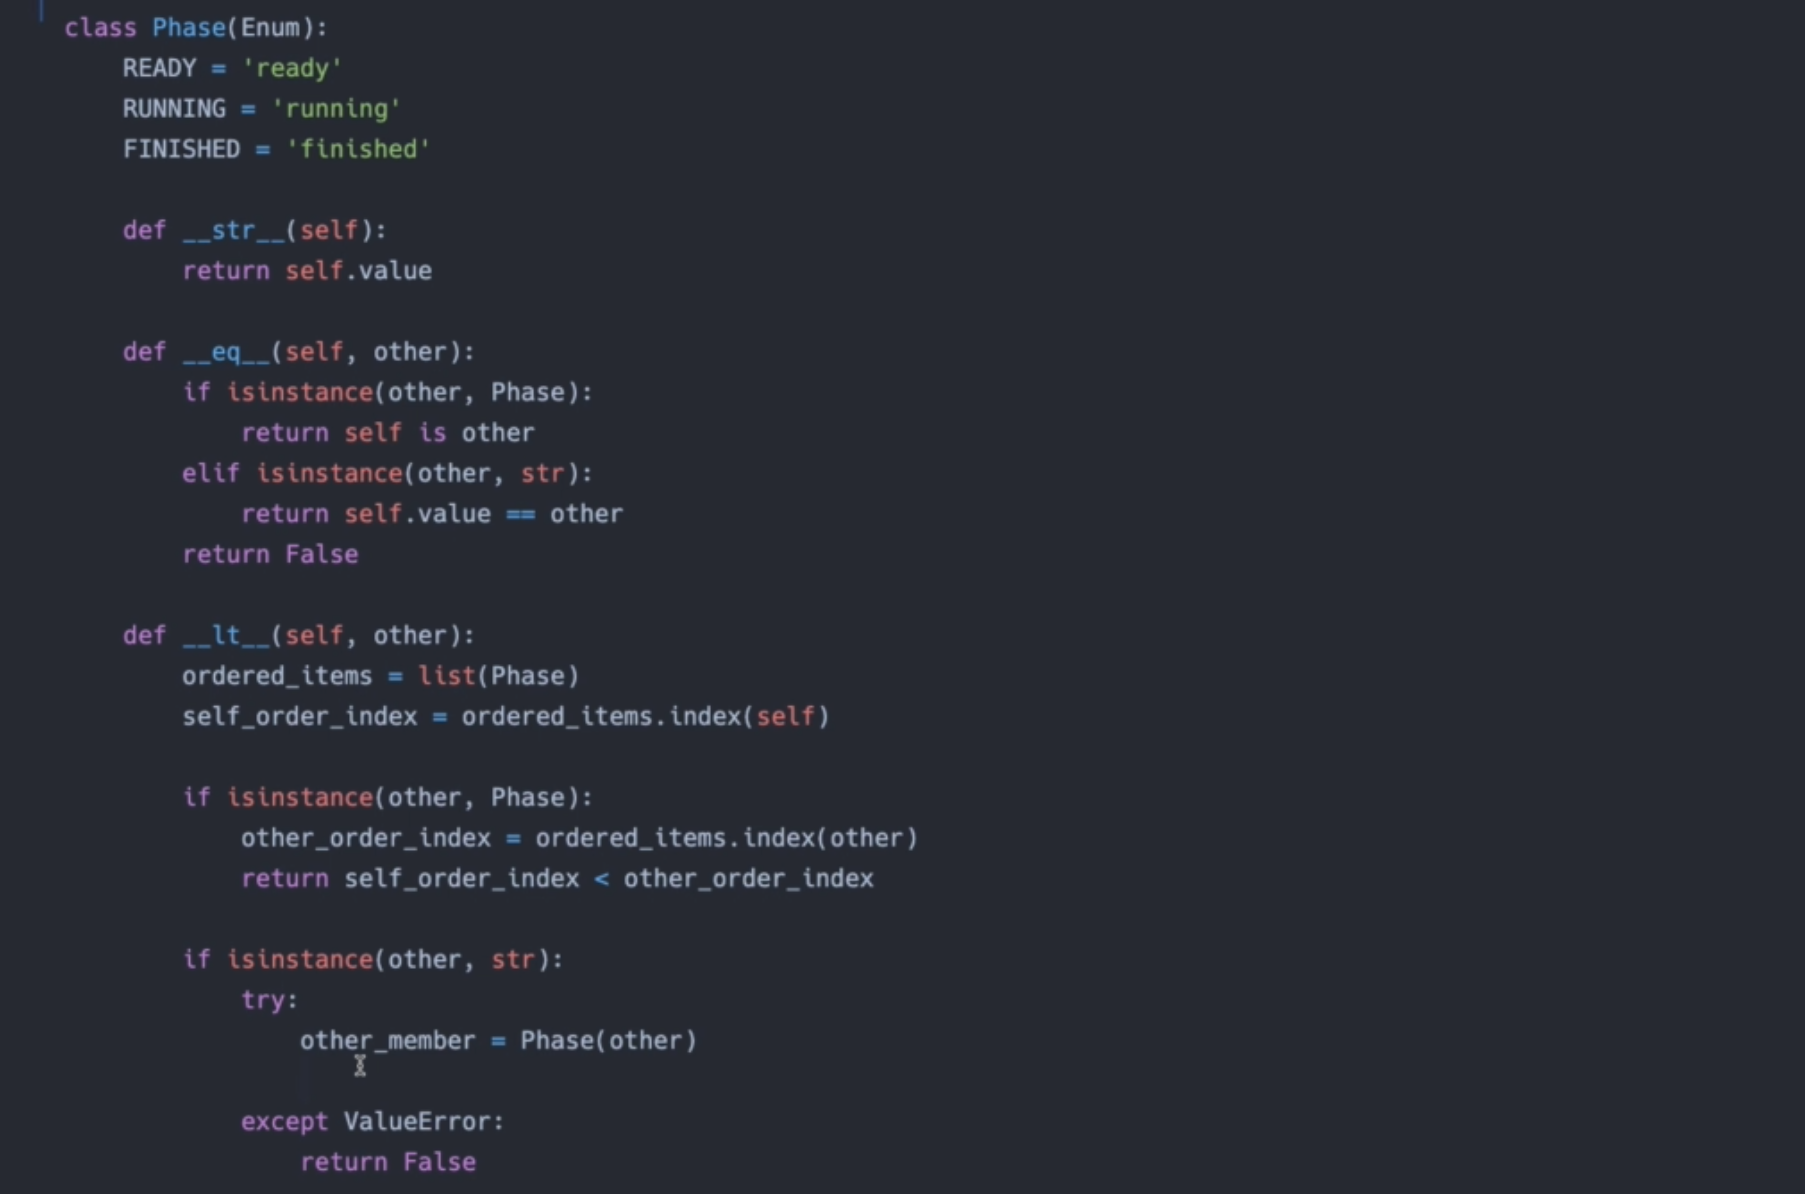

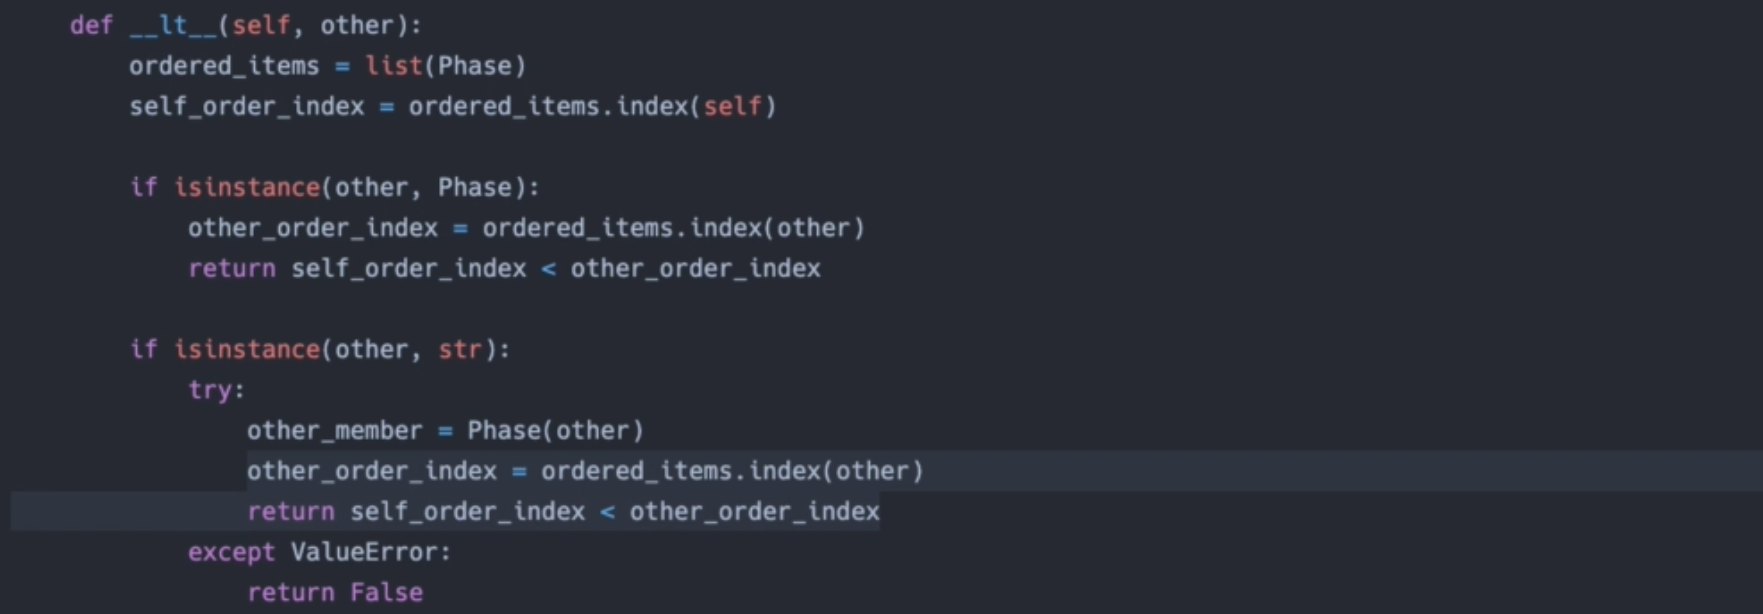

In [207]:
class Phase(Enum):
    READY = 'ready'
    RUNNING = 'running'
    FINISHED = 'finished'

In [210]:
ordered_items = list(Phase)
ordered_items

[<Phase.READY: 'ready'>,
 <Phase.RUNNING: 'running'>,
 <Phase.FINISHED: 'finished'>]

In [209]:
Phase.READY

<Phase.READY: 'ready'>

In [211]:
ordered_items.index(Phase.READY)

0

In [212]:
ordered_items.index(Phase.RUNNING)

1

In [213]:
ordered_items.index(Phase.FINISHED)

2

In [214]:
Phase('running')

<Phase.RUNNING: 'running'>

In [215]:
Phase('ready')

<Phase.READY: 'ready'>

In [216]:
Phase.READY < 'running'

TypeError: '<' not supported between instances of 'Phase' and 'str'

In [217]:
Phase.READY < Phase.RUNNING

TypeError: '<' not supported between instances of 'Phase' and 'Phase'

### Members of Enumeration are always truthy

In [218]:
class State(Enum):
    READY = 1
    BUSY = 0

In [219]:
bool(State.READY), bool(State.BUSY)

(True, True)

In [221]:
state = State.BUSY
state

<State.BUSY: 0>

In [222]:
class State(Enum):
    READY = 1
    BUSY = 0

    def __bool__(self):
        return bool(self.value)

In [223]:
bool(State.READY), bool(State.BUSY)

(True, False)

### How to create a class Factory (i.e. a function that generates classes)

In [5]:
myClass = class Hello: def __init__(self, message): print(f"Hello {message}")

SyntaxError: invalid syntax (2205513587.py, line 1)

In [ ]:
def classFactory():
    # Return a new type??
    return class